In [1]:
%cd supervised
%load_ext autoreload
%autoreload 2

import data
import train
import evaluate
import models
import torch

/home/maarten/Documents/masterthesis/supervised


In [27]:
import pickle

def save(data, fname):
    with open(fname, 'wb') as f:
        pickle.dump(data, f)
    
def load(fname):
    with open(fname, 'rb') as f:
        return pickle.read(f)

# Training size, full cross validation

In [ ]:
# main test

window_size = 2
num_clusters = 9
dataset, validset = load_dataset(num_clusters, window_size)

params = train.CNNParams(
    embed_size=100,
    dropout=0.5,
    epochs=100,
    filters=[(33, 3), (33, 5), (33, 7)],
    num_layers=1,
    max_norm=3,
)

optim_fn = lambda p: torch.optim.Adadelta(p)
model_fns = [lambda r: models.NoClusterLabels(r, params.dropout),
             lambda r: models.CategoricalClusterLabels(r, num_clusters, window_size, params.dropout)]
#             lambda r: models.CategoricalClusterLabels(r, num_clusters, window_size, params.dropout)]

baseline = {}
kmeans = {}
gmm = {}

for n in [50, 100, 400, 800, 1200, 1600, 2000, 2400]:
    values = evaluate.cross_val(10, n, model_fns, [False, False], optim_fn, dataset, params,
                                early_stopping=10,
                                validation_set=validset,
                                testset=None)
    baseline[n] = [v[0] for v in values]
    kmeans[n] = [v[1] for v in values]
#    gmm[n] = [v[2] for v in values]

In [ ]:
d = {s: {'Baseline': baseline[s],
         'K-Means': kmeans[s],
#         'Mixture model': gmm[s],
        }
    for s in baseline.keys()
}
evaluate.analyze_tseries(d, 'number of training samples', 'model', '../report/figures/results/main_window4_oldtest')
evaluate.analyze_size(d, 'number of samples', 'model', '../report/figures/results/main_window4_oldtest')

In [ ]:
evaluate.analyze_wrapper(baseline, kmeans, None, 'model', '../report/figures/results/main_window4_data_oldtest')
#evaluate.analyze_wrapper(baseline, kmeans, gmm, 'model')

# Training size, older test set

In [ ]:
# test on old data

window_size = 4
num_clusters = 9
dataset, validset, testset = load_dataset(num_clusters, window_size, True)

params = train.CNNParams(
    embed_size=100,
    dropout=0.5,
    epochs=100,
    filters=[(33, 3), (33, 5), (33, 7)],
    num_layers=1,
    max_norm=3,
)

optim_fn = lambda p: torch.optim.Adadelta(p)
model_fns = [lambda r: models.NoClusterLabels(r, params.dropout),
             lambda r: models.CategoricalClusterLabels(r, num_clusters, window_size, params.dropout)]
#             lambda r: models.CategoricalClusterLabels(r, num_clusters, window_size, params.dropout)]

baseline = {}
kmeans = {}
gmm = {}

for n in [50, 100, 400, 800, 1200, 1600, 2000, 2400]:
    values = evaluate.cross_val(10, n, model_fns, [False, False], optim_fn, dataset, params,
                                early_stopping=10,
                                validation_set=validset,
                                testset=testset)
    baseline[n] = [v[0] for v in values]
    kmeans[n] = [v[1] for v in values]
#    gmm[n] = [v[2] for v in values]

# Window size, full cross validation

In [23]:
params = train.CNNParams(
    embed_size=100,
    dropout=0.5,
    epochs=100,
    filters=[(33, 3), (33, 5), (33, 7)],
    num_layers=1,
    max_norm=3,
)

char_params = train.CharCNNParams(
    dropout=0.5,
    epochs=100,
    max_norm=3,
)

#optim_fn = lambda p: torch.optim.Adadelta(p)
optim_fn = lambda p: torch.optim.Adam(p, weight_decay=0.0001)
model_fns = [lambda r: models.NoClusterLabels(r, params.dropout),
             lambda r: models.CategoricalClusterLabels(r, num_clusters, window_size, params.dropout),
             
             lambda r: models.NoClusterLabels(r, char_params.dropout),
             lambda r: models.CategoricalClusterLabels(r, num_clusters, window_size, char_params.dropout)]
    
#baseline = {}
#kmeans = {}
#char_baseline = {}
#char_kmeans = {}

for window_size in [1]:
    num_clusters = 9
    dataset, validset = evaluate.load_dataset(num_clusters, window_size)

    values = evaluate.cross_val(5, 1600, model_fns, [False, False, False, False], optim_fn, dataset,
                                params=[params, params, char_params, char_params],
                                early_stopping=10,
                                validation_set=None,
                                batch_size=128,
                                testset=None)
    baseline[window_size] = [v[0] for v in values]
    kmeans[window_size] = [v[1] for v in values]
    char_baseline[window_size] = [v[2] for v in values]
    char_kmeans[window_size] = [v[3] for v in values]

Creating dictionary: 100%|██████████| 13/13 [00:02<00:00,  5.93it/s]


Retrieved 691 positive samples, 37708 negative samples.


Retrieved 1820 positive samples, 79736 negative samples.


Training:   0%|          | 0/100 [00:00<?, ?it/s]

1600 training samples, 2040 testing samples


Training:  49%|████▉     | 49/100 [00:30<00:31,  1.61it/s, loss=0.00241, Δloss=-0.000995]

Training:  62%|██████▏   | 62/100 [00:39<00:24,  1.58it/s, loss=0.00888, Δloss=0.00298]  

Training:  36%|███▌      | 36/100 [00:21<00:38,  1.66it/s, loss=0.00274, Δloss=0.000459] 

Training:  38%|███▊      | 38/100 [00:22<00:37,  1.66it/s, loss=0.00226, Δloss=-0.00026] 

Training:  40%|████      | 40/100 [00:24<00:36,  1.66it/s, loss=0.00302, Δloss=0.000118] 

100%|██████████| 5/5 [08:06<00:00, 97.24s/it] 


/usr/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


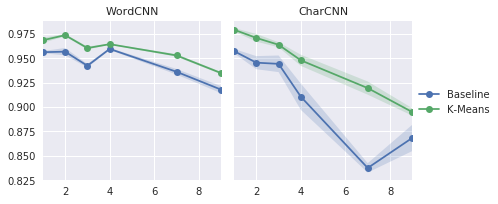

In [24]:
d = {
    "WordCNN": {
        s: {
            'Baseline': baseline[s],
            'K-Means': kmeans[s],
        }
        for s in baseline.keys()
    },
    "CharCNN": {
        s: {
            'Baseline': char_baseline[s],
            'K-Means': char_kmeans[s],
        }
        for s in baseline.keys()
    }
}
#evaluate.analyze_tseries(d, 'window size', 'model')
evaluate.analyze_cnns(d, "window size", "model", "../report/figures/results/1600-windowsize")

# Window size, older testset

In [25]:
params = train.CNNParams(
    embed_size=100,
    dropout=0.5,
    epochs=100,
    filters=[(33, 3), (33, 5), (33, 7)],
    num_layers=1,
    max_norm=3,
)

char_params = train.CharCNNParams(
    dropout=0.5,
    epochs=100,
    max_norm=3,
)

#optim_fn = lambda p: torch.optim.Adadelta(p)
optim_fn = lambda p: torch.optim.Adam(p, weight_decay=0.0001)
model_fns = [lambda r: models.NoClusterLabels(r, params.dropout),
             lambda r: models.CategoricalClusterLabels(r, num_clusters, window_size, params.dropout),
             
             lambda r: models.NoClusterLabels(r, char_params.dropout),
             lambda r: models.CategoricalClusterLabels(r, num_clusters, window_size, char_params.dropout)]
    
old_baseline = {}
old_kmeans = {}
old_char_baseline = {}
old_char_kmeans = {}

for window_size in [1, 2, 3, 4, 7, 9]:
    num_clusters = 9
    dataset, validset, testset = evaluate.load_dataset(num_clusters, window_size, True)

    values = evaluate.cross_val(5, 1600, model_fns, [False, False, False, False], optim_fn, dataset,
                                params=[params, params, char_params, char_params],
                                early_stopping=10,
                                validation_set=None,
                                batch_size=128,
                                testset=testset)
    old_baseline[window_size] = [v[0] for v in values]
    old_kmeans[window_size] = [v[1] for v in values]
    old_char_baseline[window_size] = [v[2] for v in values]
    old_char_kmeans[window_size] = [v[3] for v in values]

Creating dictionary: 100%|██████████| 13/13 [00:02<00:00,  5.80it/s]


Retrieved 691 positive samples, 37708 negative samples.
Retrieved 1254 positive samples, 58709 negative samples.
Retrieved 566 positive samples, 21027 negative samples.



Training:   0%|          | 0/100 [00:00<?, ?it/s]

1600 training samples, 1132 testing samples


Training:  61%|██████    | 61/100 [00:36<00:23,  1.67it/s, loss=0.0935, Δloss=0.00603]    

Training:  58%|█████▊    | 58/100 [00:35<00:25,  1.64it/s, loss=0.000382, Δloss=-1.43e-06]

Training:  57%|█████▋    | 57/100 [00:34<00:26,  1.63it/s, loss=0.000591, Δloss=-0.000644]

Training:  68%|██████▊   | 68/100 [00:41<00:19,  1.64it/s, loss=0.102, Δloss=0.082]       

Training:  73%|███████▎  | 73/100 [00:44<00:16,  1.64it/s, loss=0.00105, Δloss=0.000242]  

100%|██████████| 5/5 [10:22<00:00, 124.41s/it]

Training:   0%|          | 0/100 [00:00<?, ?it/s]

1600 training samples, 1120 testing samples


Training:  69%|██████▉   | 69/100 [00:53<00:23,  1.29it/s, loss=0.000328, Δloss=-6.05e-05]

Training:  32%|███▏      | 32/100 [00:24<00:52,  1.29it/s, loss=0.0166, Δloss=-0.0081]    

Training:  59%|█████▉    | 59/100 [00:45<00:31,  1.29it/s, loss=9.27e-05, Δloss=-2.41e-05]

Training:  41%|████      | 41/100 [00:32<00:46,  1.28it/s, loss=0.0706, Δloss=0.0357]     

Training:  53%|█████▎    | 53/100 [00:42<00:37,  1.26it/s, loss=0.000205, Δloss=-0.00038] 

100%|██████████| 5/5 [09:54<00:00, 118.96s/it]

Training:   0%|          | 0/100 [00:00<?, ?it/s]

1600 training samples, 1124 testing samples


Training:  44%|████▍     | 44/100 [00:40<00:52,  1.07it/s, loss=0.00635, Δloss=-0.00464]  

Training:  60%|██████    | 60/100 [00:55<00:37,  1.07it/s, loss=0.0262, Δloss=-0.0929]    

Training:  41%|████      | 41/100 [00:38<00:54,  1.08it/s, loss=0.000405, Δloss=-0.000484]

Training: 100%|██████████| 100/100 [01:32<00:00,  1.08it/s, loss=0.289, Δloss=-0.00288]   



Training:  69%|██████▉   | 69/100 [01:04<00:28,  1.08it/s, loss=4.62e-05, Δloss=-2.28e-05]

100%|██████████| 5/5 [11:52<00:00, 142.57s/it]

Training:   0%|          | 0/100 [00:00<?, ?it/s]

1600 training samples, 1124 testing samples


Training:  55%|█████▌    | 55/100 [00:57<00:47,  1.05s/it, loss=0.00013, Δloss=4.02e-05]  

Training:  49%|████▉     | 49/100 [00:52<00:54,  1.07s/it, loss=0.00778, Δloss=0.00516]   

Training:  82%|████████▏ | 82/100 [01:28<00:19,  1.08s/it, loss=0.0404, Δloss=-0.0127]    

Training:  76%|███████▌  | 76/100 [01:20<00:25,  1.05s/it, loss=0.0655, Δloss=-0.0546]    

Training:  96%|█████████▌| 96/100 [01:40<00:04,  1.05s/it, loss=0.0147, Δloss=-0.0241]    

100%|██████████| 5/5 [14:57<00:00, 179.56s/it]

Training:   0%|          | 0/100 [00:00<?, ?it/s]

1600 training samples, 1106 testing samples


Training:  52%|█████▏    | 52/100 [01:18<01:12,  1.51s/it, loss=0.0161, Δloss=-0.0405]    

Training:  54%|█████▍    | 54/100 [01:20<01:08,  1.49s/it, loss=0.0845, Δloss=0.0292]     

Training:  25%|██▌       | 25/100 [00:37<01:53,  1.51s/it, loss=0.0268, Δloss=0.0186]    

Training:  46%|████▌     | 46/100 [01:08<01:20,  1.50s/it, loss=0.00018, Δloss=-1.2e-05]  

Training:  65%|██████▌   | 65/100 [01:37<00:52,  1.49s/it, loss=0.000237, Δloss=6.55e-06] 

Creating dictionary: 100%|██████████| 13/13 [00:02<00:00,  5.62it/s]


Retrieved 687 positive samples, 36781 negative samples.
Retrieved 1244 positive samples, 57212 negative samples.
Retrieved 555 positive samples, 20480 negative samples.



Training:   0%|          | 0/100 [00:00<?, ?it/s]

1600 training samples, 1110 testing samples


Training:  41%|████      | 41/100 [01:19<01:54,  1.94s/it, loss=0.000191, Δloss=-1.59e-05]

Training:  52%|█████▏    | 52/100 [01:40<01:33,  1.94s/it, loss=0.000193, Δloss=-8.78e-06]

Training:  51%|█████     | 51/100 [01:37<01:33,  1.91s/it, loss=0.000281, Δloss=6.3e-05]  

Training:  24%|██▍       | 24/100 [00:44<02:21,  1.86s/it, loss=0.0565, Δloss=0.03]    

Training:  51%|█████     | 51/100 [01:34<01:31,  1.86s/it, loss=0.00087, Δloss=3.24e-05]  

100%|██████████| 5/5 [19:46<00:00, 237.21s/it]


/usr/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


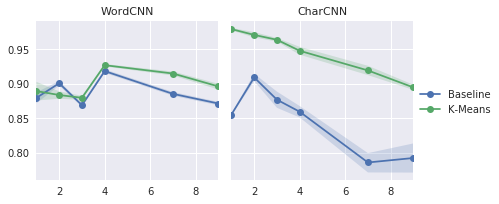

In [26]:
d = {
    "WordCNN": {
        s: {
            'Baseline': old_baseline[s],
            'K-Means': old_kmeans[s],
        }
        for s in old_baseline.keys()
    },
    "CharCNN": {
        s: {
            'Baseline': old_char_baseline[s],
            'K-Means': char_kmeans[s],
        }
        for s in old_baseline.keys()
    }
}
#evaluate.analyze_tseries(d, 'window size', 'model')
evaluate.analyze_cnns(d, "window size", "model", "../report/figures/results/1600-windowsize-old")

In [29]:
save((baseline, kmeans, char_baseline, char_kmeans), "1600-windowsize.pkl")
save((old_baseline, old_kmeans, old_char_baseline, old_char_kmeans), "1600-windowsize-old.pkl")

# Number of clusters, full cross validation

In [ ]:
params = train.CNNParams(
    embed_size=100,
    dropout=0.5,
    epochs=100,
    filters=[(33, 3), (33, 5), (33, 7)],
    num_layers=1,
    max_norm=3,
)

optim_fn = lambda p: torch.optim.Adadelta(p)
model_fns = [lambda r: models.CategoricalClusterLabels(r, num_clusters, window_size, params.dropout)]
#             lambda r: models.CategoricalClusterLabels(r, num_clusters, window_size, params.dropout)]
    
kmeans = {}
gmm = {}

for num_clusters in [2, 3, 5, 7, 9, 15, 30]:
    window_size = 5
    dataset, validset = load_dataset(num_clusters, window_size)

    values = evaluate.cross_val(10, 1200, model_fns, [False], optim_fn, dataset, params,
                                early_stopping=10,
                                validation_set=validset,
                                testset=None)
    kmeans[num_clusters] = [v[0] for v in values]
    gmm[num_clusters] = [v[1] for v in values]

In [ ]:
d = {s: {'K-Means': kmeans[s],
         #'Mixture model': gmm[s],
        }
    for s in kmeans.keys()
}
#evaluate.analyze_tseries(d, 'k', 'model')
evaluate.analyze_size(d, 'k', 'model', '../report/figures/results/800-numcluster')
evaluate.analyze_tseries(d, 'k', 'model', '../report/figures/results/800-numcluster')

In [ ]:
# test num clusters on old set

params = train.CNNParams(
    embed_size=100,
    dropout=0.5,
    epochs=100,
    filters=[(33, 3), (33, 5), (33, 7)],
    num_layers=1,
    max_norm=3,
)

optim_fn = lambda p: torch.optim.Adadelta(p)
model_fns = [lambda r: models.CategoricalClusterLabels(r, num_clusters, window_size, params.dropout),
             lambda r: models.CategoricalClusterLabels(r, num_clusters, window_size, params.dropout)]
    
kmeans = {}
gmm = {}

for num_clusters in [2, 3, 5, 7, 9, 15, 30]:
    window_size = 4
    dataset, validset, testset = load_dataset(num_clusters, window_size, True)

    values = evaluate.cross_val(10, 1600, model_fns, [False, True], optim_fn, dataset, params,
                                early_stopping=10,
                                validation_set=validset,
                                testset=testset)
    kmeans[num_clusters] = [v[0] for v in values]
    gmm[num_clusters] = [v[1] for v in values]

In [ ]:
d = {s: {'K-Means': kmeans[s],
         'Mixture model': gmm[s],
        }
    for s in kmeans.keys()
}
evaluate.analyze_tseries(d, 'k', 'model')
#evaluate.analyze_size(d, 'k', 'model', '../report/figures/results/800-numcluster_olddata')
#evaluate.analyze_tseries(d, 'k', 'model', '../report/figures/results/800-numcluster_olddata')

# Test regularization methods

In [ ]:
params = train.CNNParams(
    embed_size=300,
    dropout=0.0,
    epochs=100,
    filters=[(33, 3), (34, 5), (33, 7)],
    num_layers=1,
    max_norm=0,
)

optim_no_decay = lambda p: torch.optim.Adadelta(p)

dropout_tests = []
dropout_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
for value in dropout_values:
    params.dropout = value
    dropout_tests.append(evaluate.cross_val(10, -1,
                                            lambda r: models.NoClusterLabels(r, params.dropout),
                                            optim_no_decay, only_idx_dataset, params))

In [ ]:
evaluate.analyze(dict(zip(dropout_values, dropout_tests)), 'dropout rate', '../report/figures/results/dropout')

In [ ]:
params = train.CNNParams(
    embed_size=300,
    dropout=0.5,
    epochs=100,
    filters=[(33, 3), (34, 5), (33, 7)],
    num_layers=1,
    max_norm=3,
)

optim = lambda p: torch.optim.Adadelta(p)

l2norm_tests = []
l2norm_values = [1, 3, 4, 5, 10, 0]
for value in l2norm_values:
    params.dropout = 0.5
    params.max_norm = value
    l2norm_tests.append(evaluate.cross_val(10, -1,
                                           lambda r: models.NoClusterLabels(r, params.dropout),
                                           optim, only_idx_dataset, params))

In [ ]:
evaluate.analyze(dict(zip(map(lambda v: v if v != 0 else 'None', l2norm_values), l2norm_tests)),
                 'maximum L2 norm of weight vectors', '../report/figures/results/decay')

In [ ]:
params = train.CNNParams(
    embed_size=300,
    dropout=0.5,
    epochs=100,
    filters=[(33, 3), (34, 5), (33, 7)],
    num_layers=1,
    max_norm=2,
)

bn_tests = []
optim_fn = lambda p: torch.optim.SGD(p, lr=0.01, momentum=0.9, nesterov=True)
bn_tests.append(evaluate.cross_val(10, 400,
                                   lambda r: models.NoClusterLabels(r, params.dropout, batch_norm=False),
                                   optim_fn, only_idx_dataset, params))
bn_tests.append(evaluate.cross_val(10, 400,
                                   lambda r: models.NoClusterLabels(r, params.dropout, batch_norm=True),
                                   optim_fn, only_idx_dataset, params))

In [ ]:
evaluate.analyze({'no batchnorm': bn_tests[0],
                  'batchnorm': bn_tests[1]})